In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

os.chdir("C:/Users/admin")
df=pd.read_csv("gfr.data.revise.csv")
df

,h26,h27,h28,h29,h30,r1
0,NaN,NaN,NaN,75.0,NaN,69.3
1,59.5,NaN,47.5,NaN,NaN,NaN
2,102.8,87.4,87.1,NaN,NaN,NaN
3,57.9,NaN,NaN,NaN,67.9,61.4
4,89.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4397,97.2,NaN,NaN,NaN,NaN,NaN
4398,67.3,50.7,67.6,63.3,49.2,NaN
4399,33.0,43.4,43.2,42.7,NaN,NaN
4400,60.7,61.8,64.6,65.1,55.9,60.8


In [31]:
df.isnull()

,h26,h27,h28,h29,h30,r1
0,True,True,True,False,True,False
1,False,True,False,True,True,True
2,False,False,False,True,True,True
3,False,True,True,True,False,False
4,False,True,True,True,True,True
...,...,...,...,...,...,...
4397,False,True,True,True,True,True
4398,False,False,False,False,False,True
4399,False,False,False,False,True,True
4400,False,False,False,False,False,False


In [32]:
df.shape

(4402, 6)

In [33]:
df.isnull().sum()#欠損している要素数

h26    2099
h27    1970
h28    2037
h29    2111
h30    2159
r1     2338
dtype: int64

In [129]:
df.info()#データの要約を表示する（欠損値の確認）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   h26     2303 non-null   float64
 1   h27     2432 non-null   float64
 2   h28     2365 non-null   float64
 3   h29     2291 non-null   float64
 4   h30     2243 non-null   float64
 5   r1      2064 non-null   float64
dtypes: float64(6)
memory usage: 206.5 KB


In [130]:
df.dropna(how='any',thresh=3)#欠損値を含む行や列を削除する#threshは欠損していない要素数が３以上の行のみを保持

,h26,h27,h28,h29,h30,r1
2,102.8,87.4,87.1,NaN,NaN,NaN
3,57.9,NaN,NaN,NaN,67.9,61.4
5,63.1,60.7,64.1,57.6,61.3,NaN
6,52.8,57.9,51.7,50.8,50.6,51.0
7,NaN,87.1,85.4,NaN,84.5,NaN
...,...,...,...,...,...,...
4390,NaN,64.6,69.4,65.6,74.6,76.5
4394,70.9,76.6,78.5,79.4,73.6,74.3
4398,67.3,50.7,67.6,63.3,49.2,NaN
4399,33.0,43.4,43.2,42.7,NaN,NaN


In [134]:
df = df.dropna(how='any',thresh=3)#欠損値を含む行や列を削除する#threshは欠損していない要素数が３以上の行のみを保持

In [135]:
df.interpolate(axis=1,limit_direction="both")# 列ごとに補間する

,h26,h27,h28,h29,h30,r1
2,102.8,87.4,87.1,87.10,87.1,87.1
3,57.9,60.4,62.9,65.40,67.9,61.4
5,63.1,60.7,64.1,57.60,61.3,61.3
6,52.8,57.9,51.7,50.80,50.6,51.0
7,87.1,87.1,85.4,84.95,84.5,84.5
...,...,...,...,...,...,...
4390,64.6,64.6,69.4,65.60,74.6,76.5
4394,70.9,76.6,78.5,79.40,73.6,74.3
4398,67.3,50.7,67.6,63.30,49.2,49.2
4399,33.0,43.4,43.2,42.70,42.7,42.7


In [136]:
df = df.interpolate(axis=1,limit_direction="both")# 列ごとに補間する

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [139]:
df
trainArr = []
trainArr = df.values
np.random.shuffle(trainArr)

In [140]:
df
trainArr_X = []
trainArr_y = []
trainArr_X = trainArr[:2347, :6]
trainArr_y = trainArr[:100, -1:]
trainArr_X = trainArr_X.reshape([2347, 6 , 1])
print(trainArr_X.shape)         # (2347,6,1)
print(trainArr_y.shape)         # (100, 1)
sz = trainArr_X.shape[1]

(2347, 6, 1)
(100, 1)


In [141]:
# For this method to operate properly, prior scaling is required
trainArr_X = TimeSeriesScalerMeanVariance().fit_transform(trainArr_X)

In [142]:
df.shape#欠損していない要素数が３以上の行のみを保持していることを確認

(2367, 6)

In [143]:
df.isnull()

,h26,h27,h28,h29,h30,r1
2,False,False,False,False,False,False
3,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
...,...,...,...,...,...,...
4390,False,False,False,False,False,False
4394,False,False,False,False,False,False
4398,False,False,False,False,False,False
4399,False,False,False,False,False,False


In [144]:
df.isnull().sum()#欠損している要素数

h26    0
h27    0
h28    0
h29    0
h30    0
r1     0
dtype: int64

0.061 --> 0.054 --> 0.052 --> 0.086 --> 


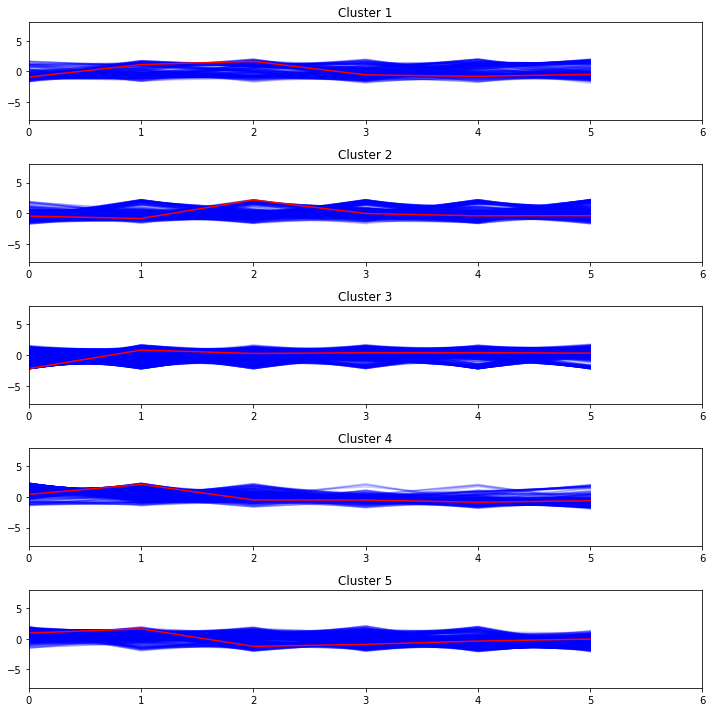

In [145]:
seed = 0
np.random.seed(seed)
ks = KShape(n_clusters=5, verbose=True, random_state=seed)
y_pred = ks.fit_predict(trainArr_X)

plt.figure(figsize=(10, 10), tight_layout = True)
for yi in range(5):
    plt.subplot(5, 1, 1 + yi)

    for xx in trainArr_X[y_pred == yi]:
        plt.plot(xx.ravel(), "b-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-8, 8)
    plt.title("Cluster %d" % (yi + 1))

plt.show()